In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#读取文件
df = pd.read_csv('C:/Users/HughOOZ/Downloads/vgsales-12-4-2019-short.csv')
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


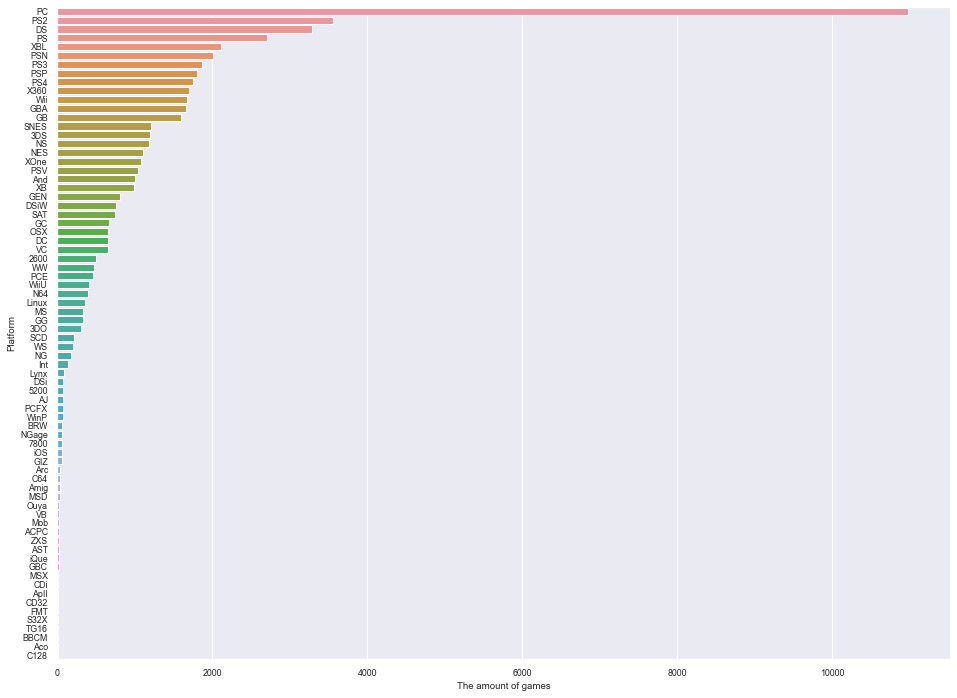

In [3]:
#交叉表
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
#使用seaborn可视化
sns.set(font_scale=0.8)
plt.figure(figsize = (16,12))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient = 'h')
plt.ylabel("Platform")
plt.xlabel("The amount of games")
plt.show()

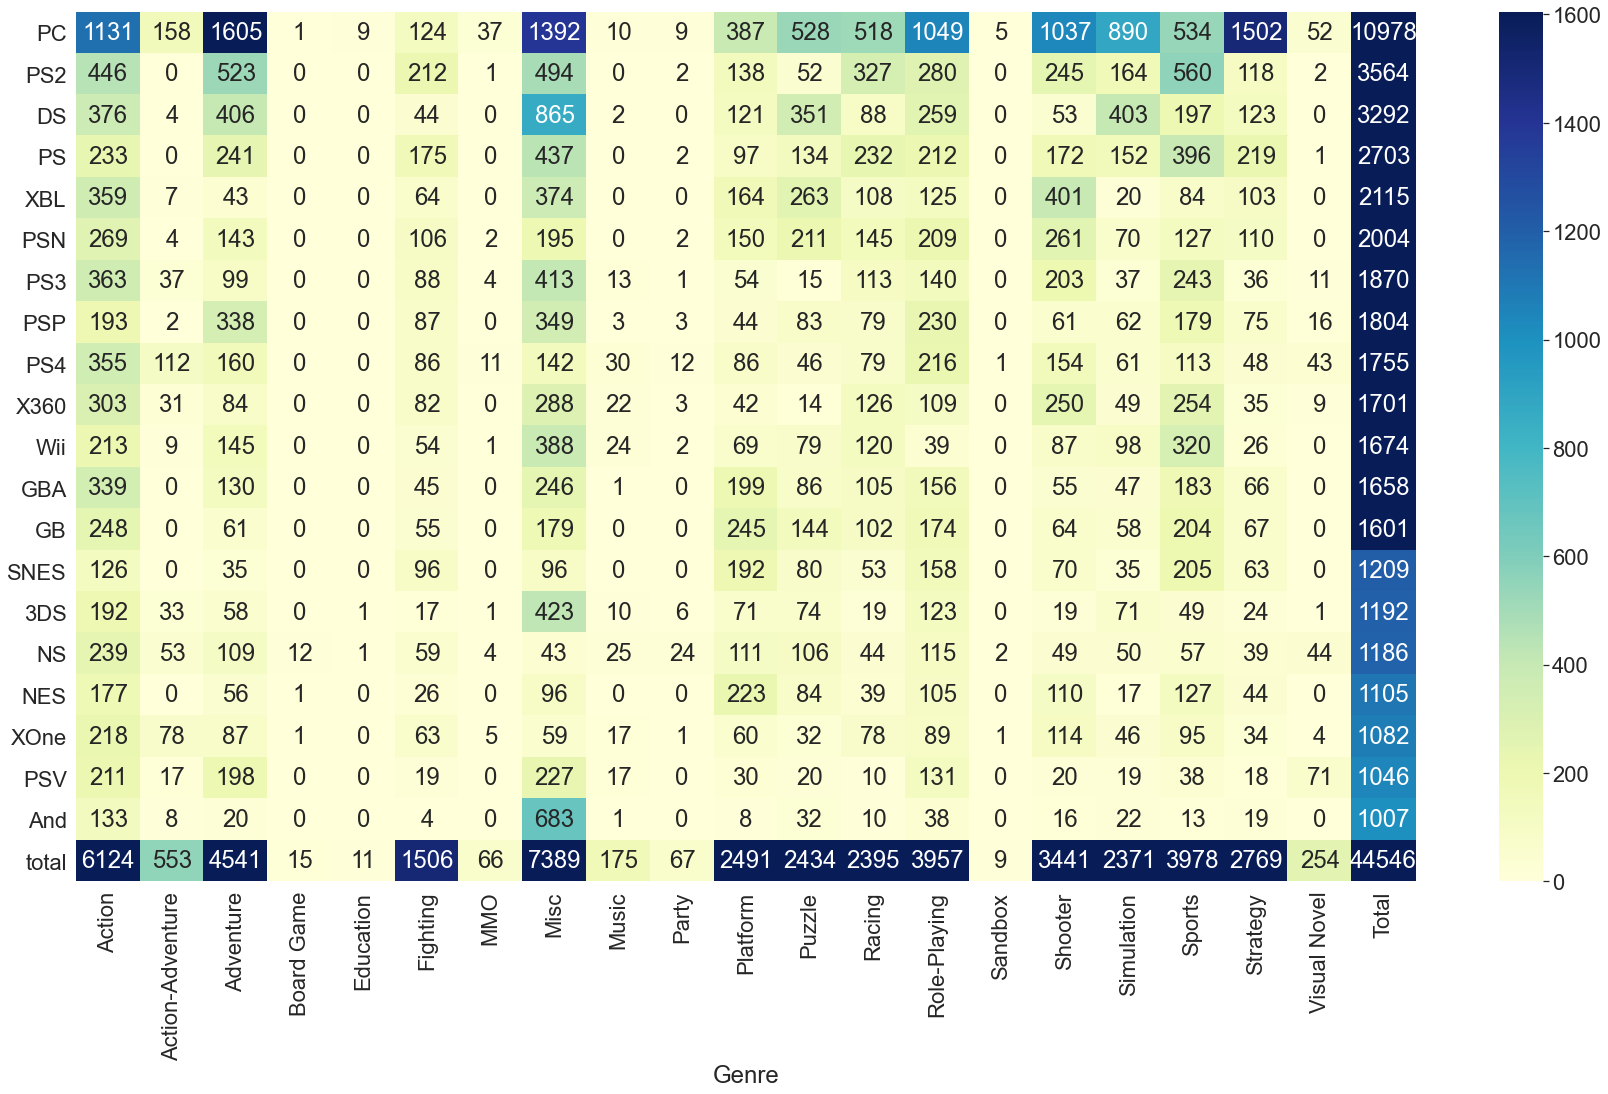

In [4]:
#添加Total列
platGenre['Total'] = platGenre.sum(axis=1)
#筛选游戏数大于1000的平台
popPlatform = platGenre[platGenre['Total'] > 1000].sort_values(by ='Total',ascending = False)
needdata = popPlatform.loc[:,:'Visual Novel']
maxi = needdata.values.max()
mini = needdata.values.min()
#添加total行
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(),columns=['total']).T,ignore_index=False)
#使用seaborn可视化
sns.set(font_scale=2)
plt.figure(figsize=(30,16))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot = True,cmap="YlGnBu", fmt='d')
plt.xticks(rotation=90)
plt.show()